<a href="https://colab.research.google.com/github/gongx030/Etv2_limb_manuscript/blob/main/FE_Heatmap_Etv2_limb_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The goal of this notebook is to split the enriched heatmap to see the regions that have peaks in E10.5 Posterior and contains the ZRS region, whereas the same regions should not have peaks in E9.5 HL.

In [ ]:
start_time0 <- Sys.time()

# **Download and load libraries required to run the analysis**

In [ ]:
system('apt-get -q install libgsl-dev', intern = TRUE)
system('apt-get install libcairo2-dev', intern = TRUE)

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following additional packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
 [5] "  libgsl23 libgslcblas0"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
 [6] "Suggested packages:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
 [7] "  gsl-ref-psdoc | gsl-doc-pdf | gsl-doc-info | gsl-ref-html"                                                           

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following additional packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
 [5] "  libcairo-script-interpreter2 libpixman-1-dev libxcb-shm0-dev"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
 [6] "Suggested packages:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
 [7] "  libcairo2-doc"                                                                                                       

In [ ]:
install.packages(c('gsl', 'devtools'))
install.packages('Cairo')
if (!requireNamespace("BiocManager", quietly = TRUE))
  install.packages("BiocManager")
BiocManager::install(c(
  'chromVAR', 'BSgenome.Mmusculus.UCSC.mm10', 'motifmatchr', 'BiocParallel', 'SummarizedExperiment', 'gplots', 'circlize', 'plyr', 'dplyr', 
  'DESeq2', 'VennDiagram', 'ggwordcloud', 'GenomicRanges', 'umap', 'dbscan'
))
devtools::install_github("GreenleafLab/chromVARmotifs")
devtools::install_github("jokergoo/ComplexHeatmap")
devtools::install_github("jokergoo/EnrichedHeatmap")

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages(c("gsl", "devtools")):
“installation of package ‘gsl’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.2 (2021-11-01)

Warning message:
“package(s) not installed when version(s) same as current; use `force = TRUE` to
  re-install: 'dplyr'”
Installing package(s) 'BiocVersion', 'chromVAR',
  'BSgenome.Mmusculus.UCSC.mm10', 'motifmatchr', 'BiocParallel',
  'SummarizedExperiment', 'gplots', 'circlize', 'plyr', 'DESeq2',
  'VennDiagram', 'ggwordcloud', 'GenomicRanges', 'umap', 'dbscan'

also installing the dependencies 


* checking for file ‘/tmp/RtmpdaqnqK/remotes48f710e65/GreenleafLab-chromVARmotifs-38bed55/DESCRIPTION’ ... OK
* preparing ‘chromVARmotifs’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘chromVARmotifs_0.2.0.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




iterators  (NA -> 1.0.13) [CRAN]
foreach    (NA -> 1.5.1 ) [CRAN]
doParallel (NA -> 1.0.16) [CRAN]
clue       (NA -> 0.3-60) [CRAN]
GetoptLong (NA -> 1.0.5 ) [CRAN]


Installing 5 packages: iterators, foreach, doParallel, clue, GetoptLong

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



* checking for file ‘/tmp/RtmpdaqnqK/remotes482c2175f0/jokergoo-ComplexHeatmap-826b321/DESCRIPTION’ ... OK
* preparing ‘ComplexHeatmap’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘ComplexHeatmap_2.11.1.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)





* checking for file ‘/tmp/RtmpdaqnqK/remotes48a60762e/jokergoo-EnrichedHeatmap-de399c5/DESCRIPTION’ ... OK
* preparing ‘EnrichedHeatmap’:
* checking DESCRIPTION meta-information ... OK
* cleaning src
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Removed empty directory ‘EnrichedHeatmap/test’
* building ‘EnrichedHeatmap_1.23.1.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
if (!requireNamespace("BiocManager", quietly = TRUE))
  install.packages("BiocManager")
BiocManager::install(c(
  'BSgenome.Mmusculus.UCSC.mm10'
))

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.2 (2021-11-01)

Warning message:
“package(s) not installed when version(s) same as current; use `force = TRUE` to
  re-install: 'BSgenome.Mmusculus.UCSC.mm10'”
Old packages: 'EnrichedHeatmap', 'IRdisplay', 'IRkernel', 'repr', 'broom',
  'gert', 'nlme'



In [ ]:
library(chromVARmotifs)
library(chromVAR)
library(BSgenome.Mmusculus.UCSC.mm10)
library(motifmatchr)
library(BiocParallel)
library(SummarizedExperiment)
library(gplots)
library(circlize)
library(ComplexHeatmap)
register(MulticoreParam(4)) # Use 8 cores
library(plyr)
library(dplyr)
library(DESeq2)
library(VennDiagram)
library(ggwordcloud)
library(GenomicRanges)
library(EnrichedHeatmap)
library(umap)
library(dbscan)
library(reshape2)
library(tidyr)
library(parallel)



Loading required package: BSgenome

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors

Loading required package: stats4


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomeInfoDb

Loading required package: GenomicRanges

Loading required package: Biostrings

Loadin

# **Download metadata and bed files for a unioin Etv2 limb peak set'gr'**

In [ ]:
remote_meta_file <- 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Limb_Metadata.tsv'
local_meta_file <- gsub('https://s3.msi.umn.edu/', './', remote_meta_file)
system(sprintf('wget -x -c -nH %s', remote_meta_file))

In [ ]:
meta <- read.table(local_meta_file, header = TRUE, sep = '\t')
head(meta)

,Name,BAM,BED,BigWig
,<chr>,<chr>,<chr>,<chr>
1,Etv2cKO_10-31-20_S7,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Etv2cKO_10-31-20_S7.dedup.bam,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Etv2cKO_10-31-20_S7.dedup_summits.bed,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Etv2cKO_10-31-20_S7.dedup_treat_pileup.bw
2,Etv2cKO_11-07-20_S8,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Etv2cKO_11-07-20_S8.dedup.bam,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Etv2cKO_11-07-20_S8.dedup_summits.bed,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Etv2cKO_11-07-20_S8.dedup_treat_pileup.bw
3,Etv2cKO_11-28-20_S9,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Etv2cKO_11-28-20_S9.dedup.bam,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Etv2cKO_11-28-20_S9.dedup_summits.bed,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Etv2cKO_11-28-20_S9.dedup_treat_pileup.bw
4,Etv2cKO_12-1-20_S10,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Etv2cKO_12-1-20_S10.dedup.bam,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Etv2cKO_12-1-20_S10.dedup_summits.bed,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Etv2cKO_12-1-20_S10.dedup_treat_pileup.bw
5,Etv2cKO_12-9-20_S11,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Etv2cKO_12-9-20_S11.dedup.bam,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Etv2cKO_12-9-20_S11.dedup_summits.bed,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Etv2cKO_12-9-20_S11.dedup_treat_pileup.bw
6,LimbWT_1_12-4-20_S12,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/LimbWT_1_12-4-20_S12.dedup.bam,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/LimbWT_1_12-4-20_S12.dedup_summits.bed,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/LimbWT_1_12-4-20_S12.dedup_treat_pileup.bw


In [ ]:
meta <- meta[!grepl('Sall|916-', meta$Name),] ##Only keeping the 25 old and 7 new atac seq data 

In [ ]:
meta_name <- gsub('-|_S[0-9]+', '', meta$Name)
meta_name <- gsub('7[0-9]+_', '', meta_name)
meta_name <- gsub('_[0-9]+', '', meta_name)
meta_name <- gsub('Etv2_', 'HL_Etv2_', meta_name)
meta_name <- gsub('whole_', '', meta_name)
meta_name <- gsub('ATAC_GFP','Posterior_E10_5',meta_name)
meta_name <- gsub('ATAC_anterior', 'Anterior_E10_5', meta_name)
meta_name <- gsub('ATAC', 'HL_E9_5', meta_name)
meta_name

[1] "Etv2cKO"             "Etv2cKO"             "Etv2cKO"            
 [4] "Etv2cKO"             "Etv2cKO"             "LimbWT"             
 [7] "LimbWT"              "FL_GFP_neg"          "FL_GFP_pos"         
[10] "HL_GFP_neg"          "HL_GFP_pos"          "HL_Etv2_het"        
[13] "HL_Etv2_CKO"         "HL_Etv2_het"         "HL_Etv2_CKO"        
[16] "HL_Etv2_CKO"         "FL_GFP_neg"          "FL_GFP_pos"         
[19] "HL_GFP_neg"          "HL_GFP_pos"          "FL_GFP_neg"         
[22] "FL_GFP_pos"          "HL_GFP_neg"          "HL_GFP_pos"         
[25] "Etv2CKO_posteriorHL" "Etv2CKO_posteriorHL" "WT_HL"              
[28] "WT_HL"               "Anterior_E10_5"      "HL_E9_5"            
[31] "Posterior_E10_5"     "WT_LPM_NT1"

In [ ]:
s3_bed <- meta$BED
names(s3_bed) <- meta_name ##using meta data names that were modified

In [ ]:
for (i in 1:length(s3_bed)){
  sprintf('wget -x -c -nH %s', s3_bed[i]) %>% system()
}
s3_bed <- gsub('https://s3.msi.umn.edu/', './', s3_bed)
message(sprintf('all s3_bed exist: %s', all(file.exists(s3_bed))))

all s3_bed exist: TRUE



In [ ]:
gr_list <- lapply(1:length(s3_bed), function(i){
  x <- read.table(s3_bed[i], header = FALSE, sep = '\t')
  gr <- GRanges(seqnames = x[, 1], range = IRanges(x[, 2], x[, 3]), peak_id = x[, 4], score = x[, 5])
  gr$source <- names(s3_bed)[i]
  gr
})

In [ ]:
gr <- Reduce('c', gr_list)
gr <- resize(gr, width = 200, fix = 'center')
gr0 <- reduce(gr) 
mm <- as.matrix(findOverlaps(gr, gr0))
sp <- split(mm[, 1], list(mm[, 2]))
j <- unlist(mclapply(sp, function(i) i[which.max(gr$score[i])], mc.cores = 4))
gr <- gr[j]
G <- do.call('cbind', lapply(1:length(s3_bed), function(i) gr %over% gr_list[[i]]))
gr$group <- G
colnames(gr$group) <- names(s3_bed)
gr

GRanges object with 135211 ranges and 4 metadata columns:
           seqnames            ranges strand |                peak_id     score
              <Rle>         <IRanges>  <Rle> |            <character> <numeric>
       [1]     chr1   3191816-3192015      * | /panfs/roc/scratch/d..  11.89920
       [2]     chr1   3400047-3400246      * | /panfs/roc/scratch/d..  13.78180
       [3]     chr1   3647523-3647722      * | /panfs/roc/scratch/d..  14.78840
       [4]     chr1   3649033-3649232      * | /panfs/roc/scratch/d..   5.47637
       [5]     chr1   3651338-3651537      * | /panfs/roc/scratch/d..   9.54477
       ...      ...               ...    ... .                    ...       ...
  [135207]     chrY 90828856-90829055      * | /panfs/roc/scratch/d..  35.17030
  [135208]     chrY 90829716-90829915      * | /panfs/roc/scratch/d..   2.15339
  [135209]     chrY 90835556-90835755      * | /panfs/roc/scratch/d..   8.03207
  [135210]     chrY 90838629-90838828      * | /panfs/roc/scra

In [ ]:
 gr <- gr[!seqnames(gr) %in% c('chrM', 'chrY')]

In [ ]:
blacklist_file <- 'https://s3.msi.umn.edu/gongx030/datasets/datasets=blacklists_version=20190827a/mm10.blacklist.bed.gz'
blacklist <- blacklist_file %>%
  url() %>%
  gzcon() %>%
  readLines() %>%
  textConnection() %>%
  read.table(header = TRUE, sep = '\t')
blacklist <- GRanges(seqnames = blacklist[, 1], range = IRanges(blacklist[, 2], blacklist[, 3]))

gr <- gr[!gr %over% blacklist]
gr

GRanges object with 134677 ranges and 4 metadata columns:
           seqnames              ranges strand |                peak_id
              <Rle>           <IRanges>  <Rle> |            <character>
       [1]     chr1     3191816-3192015      * | /panfs/roc/scratch/d..
       [2]     chr1     3400047-3400246      * | /panfs/roc/scratch/d..
       [3]     chr1     3647523-3647722      * | /panfs/roc/scratch/d..
       [4]     chr1     3649033-3649232      * | /panfs/roc/scratch/d..
       [5]     chr1     3651338-3651537      * | /panfs/roc/scratch/d..
       ...      ...                 ...    ... .                    ...
  [134673]     chrX 170859281-170859480      * | /panfs/roc/scratch/d..
  [134674]     chrX 170862187-170862386      * | /panfs/roc/scratch/d..
  [134675]     chrX 170865416-170865615      * | /panfs/roc/scratch/d..
  [134676]     chrX 170867099-170867298      * | /panfs/roc/scratch/d..
  [134677]     chrX 170881030-170881229      * | /panfs/roc/scratch/d..
      

# **Loading motif data and extracting Positional Weight Matrix for Etv2**

In [ ]:
data("homer_pwms") 

In [ ]:
names(homer_pwms)[grepl('Etv2', names(homer_pwms))]

[1] "Etv2(ETS)/ES-ER71-ChIP-Seq(GSE59402)/Homer(0.967)"

In [ ]:
homer_pwms['Etv2(ETS)/ES-ER71-ChIP-Seq(GSE59402)/Homer(0.967)']

PWMatrixList of length 1
names(1): Etv2(ETS)/ES-ER71-ChIP-Seq(GSE59402)/Homer(0.967)

In [ ]:
binding_sites <- matchMotifs(
homer_pwms['Etv2(ETS)/ES-ER71-ChIP-Seq(GSE59402)/Homer(0.967)'], 
resize(gr, width = 200, fix = 'center'),
genome = BSgenome.Mmusculus.UCSC.mm10,
p.cutoff = 5e-05,
out = 'positions'
)[[1]]

This is the binding sites for the Etv2 motifs

In [ ]:
binding_sites

GRanges object with 8563 ranges and 1 metadata column:
         seqnames              ranges strand |     score
            <Rle>           <IRanges>  <Rle> | <numeric>
     [1]     chr1     4571746-4571757      - |   8.14628
     [2]     chr1     4775237-4775248      + |   8.02301
     [3]     chr1     4785700-4785711      - |   7.68610
     [4]     chr1     4843892-4843903      - |   7.84453
     [5]     chr1     6761368-6761379      + |   7.75192
     ...      ...                 ...    ... .       ...
  [8559]     chrX 170675522-170675533      - |   7.73663
  [8560]     chrX 170841992-170842003      + |   7.75203
  [8561]     chrX 170854586-170854597      + |   7.75203
  [8562]     chrX 170859360-170859371      + |   7.75203
  [8563]     chrX 170867276-170867287      + |   7.75203
  -------
  seqinfo: 22 sequences from an unspecified genome; no seqlengths

In [ ]:
seqlevels(binding_sites) <- seqlevels(BSgenome.Mmusculus.UCSC.mm10)
seqlengths(seqinfo(binding_sites)) <- seqlengths(BSgenome.Mmusculus.UCSC.mm10)
genome(seqinfo(binding_sites)) <- providerVersion(BSgenome.Mmusculus.UCSC.mm10)

Warning message:
“  Using providerVersion() on a BSgenome object is deprecated. Please use
  'metadata(x)$genome' instead.”


#**Bigwig files that would be used for Enriched Heatmap**

In [ ]:
s3_bw_files <- c(
  'E10_5_Posterior' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/ATAC_105_GFP_S32_FE_sorted.bw',
  'E9.5_HL' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/ATAC_95_S30_FE_sorted.bw',
  'Etv2cKO_E10_25' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Etv2cKO_E10_25_FE_sorted.bw',
  'Etv2_CKO_E10_5' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Etv2CKO_posteriorHL_FE_sorted.bw',
  'WT_E10_25' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/WT_E10_25_FE_sorted.bw',
  'FL_GFP_pos_E10_5' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/FL_GFP_pos_E10_5_FE_sorted.bw',
  'HL_GFP_pos_E10_5' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/HL_GFP_pos_E10_5_FE_sorted.bw',
  'E_10_5_Anterior' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/ATAC_105_anterior_S31_FE_sorted.bw')

In [ ]:
for (i in 1:length(s3_bw_files)){
  sprintf('wget -x -c -nH %s', s3_bw_files[i]) %>% system()
}


In [ ]:
s3_bw_files <- gsub('https://s3.msi.umn.edu/', './', s3_bw_files)
message(sprintf('all local_bw_files exist: %s', all(file.exists(s3_bw_files))))

all local_bw_files exist: TRUE



Parameters to be used for generating Normalized matrix

In [ ]:
window_size <- 1000L
block_size <- 640L

In [ ]:
w <- 25
smooth <- FALSE
target_width <- 20
extend <- 1000
target_ratio <- 1 / (2 * extend  / target_width + 1)
#extend <- 300L / 2 
#target_ratio <- 0
sprintf('target_ratio:%.3f', target_ratio) %>% message()

target_ratio:0.010



# Subsetting gr to include the Etv2 binding motif's and then using the true or false matrix in gr to split the enriched heatmap based on H9.5 HL and E10.5 Posterior

In [ ]:
bd <- findOverlaps(gr, binding_sites) ##Finding overlap between union peak set and binding sites
bds <- gr[queryHits(bd)]

In [ ]:
sp2 <- factor(sprintf('%s_%s', bds$group[, 'HL_E9_5'], bds$group[, 'Posterior_E10_5'])) ##Groups based on the rpesence of a peak to be split in enriched heatmap

# LIMB Enhancer dataset from Vista (https://enhancer.lbl.gov) and Limb Enhancer Genie (/https://leg.lbl.gov/)

## Vista

Vista looks at different enhancers in Human(hg19) and mouse(mm9). They have an advanced search where you can specifically look at limb enhancers. It gives you data containg chromosome position and sequence. After filtering and getting the crhomosome position, we then need to perform a liftover from mm9 to mm10.

In [ ]:
enhancer <- 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/limb_enhancer_mm10.bed' 
local_enhancer <- gsub('https://s3.msi.umn.edu/', './', enhancer)
system(sprintf('wget -x -c -nH %s', enhancer))
limb_enhancer <- read.table(local_enhancer, header = FALSE, sep = '\t')
colnames(limb_enhancer) <- c('chr')
limb_enhancer <- colsplit(string=limb_enhancer$chr, pattern=":|-", names=c("chr", "start", "end"))
head(limb_enhancer)

,chr,start,end
,<chr>,<int>,<int>
1,chr1,41274476,41276046
2,chr1,75784368,75787445
3,chr1,75800898,75805337
4,chr1,75882677,75886487
5,chr1,92789102,92792922
6,chr1,162074031,162077560


In [ ]:
gr_limb <- GRanges(seqnames = limb_enhancer$chr, ranges = IRanges(limb_enhancer$start, limb_enhancer$end))
gr_limb

GRanges object with 175 ranges and 0 metadata columns:
        seqnames            ranges strand
           <Rle>         <IRanges>  <Rle>
    [1]     chr1 41274476-41276046      *
    [2]     chr1 75784368-75787445      *
    [3]     chr1 75800898-75805337      *
    [4]     chr1 75882677-75886487      *
    [5]     chr1 92789102-92792922      *
    ...      ...               ...    ...
  [171]    chr18 68909329-68911841      *
  [172]    chr19 58371922-58373062      *
  [173]    chr19 59423214-59425570      *
  [174]    chr19 60015442-60016837      *
  [175]     chrX 13240831-13243993      *
  -------
  seqinfo: 19 sequences from an unspecified genome; no seqlengths

In [ ]:
le <- findOverlaps(binding_sites, gr_limb)
gr_le <- binding_sites[queryHits(le)]
gr_le

GRanges object with 26 ranges and 1 metadata column:
       seqnames              ranges strand |     score
          <Rle>           <IRanges>  <Rle> | <numeric>
   [1]     chr1   75786408-75786419      + |   8.16630
   [2]     chr1   75804013-75804024      + |   7.88866
   [3]     chr1 192799526-192799537      - |   7.75203
   [4]    chr14   24263077-24263088      + |   8.08263
   [5]    chr14   73234572-73234583      + |   8.14656
   ...      ...                 ...    ... .       ...
  [22]     chr8   25545015-25545026      - |   7.88166
  [23]     chr8   91713334-91713345      - |   8.37895
  [24]     chr8 126826541-126826552      + |   7.96193
  [25]     chr9   23011611-23011622      + |   8.05918
  [26]     chr9 118980595-118980606      + |   7.69570
  -------
  seqinfo: 239 sequences from mm10 genome

In [ ]:
bs <- as.data.frame(binding_sites)
bs$GI <- paste(bs$start, bs$end, sep = '-')
bs$GI <- paste(bs$seqnames, bs$GI, sep = ':') #Getting rownames for the countdata matrix in the form chr5:29315455-29315466
bs$log <- sp2

In [ ]:
df_le <- as.data.frame(gr_le)
df_le$GI <- paste(df_le$start, df_le$end, sep = '-')
df_le$GI <- paste(df_le$seqnames, df_le$GI, sep = ':')

In [ ]:
le_dat<- bs[bs$GI %in% df_le$GI,]
le_dat[grepl('FALSE_TRUE', le_dat$log),]

,seqnames,start,end,width,strand,score,GI,log
,<fct>,<int>,<int>,<int>,<fct>,<dbl>,<chr>,<fct>
205,chr1,75786408,75786419,12,+,8.166299,chr1:75786408-75786419,FALSE_TRUE
4226,chr19,59423803,59423814,12,-,8.663834,chr19:59423803-59423814,FALSE_TRUE
5229,chr3,101398611,101398622,12,+,8.191014,chr3:101398611-101398622,FALSE_TRUE
6431,chr5,143001323,143001334,12,-,7.982448,chr5:143001323-143001334,FALSE_TRUE


In [ ]:
sprintf('Percent of Limb enhancers Genomic Intervals overlapping just the E10.5 Posterior only cluster: %f', nrow(le_dat[grepl('FALSE_TRUE', le_dat$log),])/nrow(limb_enhancer)*100) %>% message()

Percent of Limb enhancers Genomic Intervals overlapping just the E10.5 Posterior only cluster: 2.285714



## LEG(Limb Enhancer Genie)

In [ ]:
leg <- 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/EnhancerGenieResults.bed'
local_leg <- gsub('https://s3.msi.umn.edu/', './', leg)
system(sprintf('wget -x -c -nH %s', leg))
leg_df <- read.table(local_leg, header = FALSE, sep = '\t')
head(leg_df)

,V1,V2,V3,V4,V5,V6
,<chr>,<int>,<int>,<chr>,<int>,<chr>
1,chr15,12513088,12519088,unnamed.2392,925,.
2,chr9,41933804,41939804,unnamed.6886,923,.
3,chr19,53079626,53082626,unnamed.3584,920,.
4,chr19,38296630,38300630,unnamed.3544,919,.
5,chr8,102982033,102987033,unnamed.6678,916,.
6,chr14,67381348,67385348,unnamed.2232,913,.


In [ ]:
gr_leg <- GRanges(seqnames = leg_df$V1, ranges = IRanges(leg_df$V2, leg_df$V3))
gr_leg

GRanges object with 984 ranges and 0 metadata columns:
        seqnames              ranges strand
           <Rle>           <IRanges>  <Rle>
    [1]    chr15   12513088-12519088      *
    [2]     chr9   41933804-41939804      *
    [3]    chr19   53079626-53082626      *
    [4]    chr19   38296630-38300630      *
    [5]     chr8 102982033-102987033      *
    ...      ...                 ...    ...
  [980]     chr9   29117807-29119807      *
  [981]     chr2 124718955-124720955      *
  [982]     chr2 124718955-124720955      *
  [983]     chrX 138103026-138105026      *
  [984]     chr3   50926706-50928706      *
  -------
  seqinfo: 20 sequences from an unspecified genome; no seqlengths

In [ ]:
leg_fo <- findOverlaps(binding_sites, gr_leg)
gr_fo <- binding_sites[queryHits(leg_fo)]
gr_fo

GRanges object with 1099 ranges and 1 metadata column:
         seqnames              ranges strand |     score
            <Rle>           <IRanges>  <Rle> | <numeric>
     [1]     chr1     4843892-4843903      - |   7.84453
     [2]     chr1   10261299-10261310      - |   8.32767
     [3]     chr1   11355645-11355656      + |   7.75578
     [4]     chr1   12510496-12510507      + |   7.65710
     [5]     chr1   13245882-13245893      - |   8.66383
     ...      ...                 ...    ... .       ...
  [1095]     chrX 153469344-153469355      - |   7.65710
  [1096]     chrX 153469344-153469355      - |   7.65710
  [1097]     chrX 153470600-153470611      - |   8.38512
  [1098]     chrX 153470600-153470611      - |   8.38512
  [1099]     chrX 155208874-155208885      - |   7.68072
  -------
  seqinfo: 239 sequences from mm10 genome

In [ ]:
leg_dat <- as.data.frame(gr_fo)
leg_dat$GI <- paste(leg_dat$start, leg_dat$end, sep = '-')
leg_dat$GI <- paste(leg_dat$seqnames, leg_dat$GI, sep = ':')
head(leg_dat)

,seqnames,start,end,width,strand,score,GI
,<fct>,<int>,<int>,<int>,<fct>,<dbl>,<chr>
1,chr1,4843892,4843903,12,-,7.844530,chr1:4843892-4843903
2,chr1,10261299,10261310,12,-,8.327674,chr1:10261299-10261310
3,chr1,11355645,11355656,12,+,7.755781,chr1:11355645-11355656
4,chr1,12510496,12510507,12,+,7.657101,chr1:12510496-12510507
5,chr1,13245882,13245893,12,-,8.663834,chr1:13245882-13245893
6,chr1,14512810,14512821,12,-,8.333966,chr1:14512810-14512821


In [ ]:
leg_sub <- bs[bs$GI %in% leg_dat$GI,]
nrow(leg_sub[grepl('FALSE_TRUE', leg_sub$log),])
head(leg_sub[grepl('FALSE_TRUE', leg_sub$log),])

[1] 252

,seqnames,start,end,width,strand,score,GI,log
,<fct>,<int>,<int>,<int>,<fct>,<dbl>,<chr>,<fct>
9,chr1,10261299,10261310,12,-,8.327674,chr1:10261299-10261310,FALSE_TRUE
16,chr1,13245882,13245893,12,-,8.663834,chr1:13245882-13245893,FALSE_TRUE
35,chr1,20135274,20135285,12,+,8.598601,chr1:20135274-20135285,FALSE_TRUE
145,chr1,57076331,57076342,12,-,7.823929,chr1:57076331-57076342,FALSE_TRUE
149,chr1,57479290,57479301,12,+,8.640968,chr1:57479290-57479301,FALSE_TRUE
162,chr1,62564433,62564444,12,-,8.070349,chr1:62564433-62564444,FALSE_TRUE


Generating a column containing 1 and 0 equivalent to True or False. So leg_dat is the overlapped dataset and contains chromosome position information. If the value in the binding sites chromosome information matches the value in the leg_dat dataframe it would assign a value 1 in the new column 'limb' 

In [ ]:
bs$limb <- ifelse(bs$GI %in% leg_dat$GI, 1, 0) ##This column will be used in the heatmap to see the position of the enhancers after clustering the enriched heatmap
nrow(bs[bs$limb == 1,]) ##Double checking the count of values assigned 1, needs to be 984

[1] 998

In [ ]:
sprintf('Percent of Limb enhancers Genomic Intervals from "Limb Enhancer Genie" overlapping just the E10.5 Posterior only cluster: %f', nrow(leg_sub[grepl('FALSE_TRUE', leg_sub$log),])/nrow(leg_sub)*100) %>% message()

Percent of Limb enhancers Genomic Intervals from "Limb Enhancer Genie" overlapping just the E10.5 Posterior only cluster: 25.250501



In [ ]:
bs$limb

[1] 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0
  [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0
  [75] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [112] 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 [149] 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 [186] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0
 [223] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 [260] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 [297] 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0
 [334] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0
 [371] 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0
 [408] 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [445] 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [482] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0 0 0 0
 [519] 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [556] 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [593] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 [630] 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [667] 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [704] 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0
 [741] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0
 [778] 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0
 [815] 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 [852] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 [889] 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 [926] 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 0 0 0 0
 [963] 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1000] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 1
[1037] 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0
[1074] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1111] 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0
[1148] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 1 0 0
[1185] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
[1222] 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1259] 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
[1296] 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1333] 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0
[1370] 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1
[1407] 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1444] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1481] 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0
[1518] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
[1555] 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0
[1592] 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1629] 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1666] 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
[1703] 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1
[1740] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
[1777] 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0
[1814] 0 0 0 0 0 0 0 0 0 0 0 0 1 0

## Limb Enhancer P300 dataset from'ChIP-seq accurately predicts tissue-specific activity of enhancers'

In [ ]:
p300 <- 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Limb_mm10_enhancer.bed'
local_p300 <- gsub('https://s3.msi.umn.edu/', './', p300)
system(sprintf('wget -x -c -nH %s', p300))
p300_df <- read.table(local_p300, header = FALSE, sep = ':')
head(p300_df)

,V1,V2
,<chr>,<chr>
1,chr1,11026944-11027320
2,chr1,11744744-11745245
3,chr1,12615394-12616095
4,chr1,12690294-12691295
5,chr1,13426194-13426695
6,chr1,13860894-13861645


In [ ]:
p300_df <- p300_df %>%
  separate(V2, c("start", "end"), "-")

In [ ]:
p300_df$start <- as.integer(p300_df$start)

In [ ]:
p300_df$end <- as.integer(p300_df$end)

In [ ]:
head(p300_df)

,V1,start,end
,<chr>,<int>,<int>
1,chr1,11026944,11027320
2,chr1,11744744,11745245
3,chr1,12615394,12616095
4,chr1,12690294,12691295
5,chr1,13426194,13426695
6,chr1,13860894,13861645


In [ ]:
gr_p300 <- GRanges(seqnames = p300_df$V1, ranges = IRanges(p300_df$start, p300_df$end))
gr_p300

GRanges object with 2105 ranges and 0 metadata columns:
         seqnames              ranges strand
            <Rle>           <IRanges>  <Rle>
     [1]     chr1   11026944-11027320      *
     [2]     chr1   11744744-11745245      *
     [3]     chr1   12615394-12616095      *
     [4]     chr1   12690294-12691295      *
     [5]     chr1   13426194-13426695      *
     ...      ...                 ...    ...
  [2101]     chrX 106186486-106187362      *
  [2102]     chrX 122831141-122831692      *
  [2103]     chrX 129756714-129757390      *
  [2104]     chrX 145509757-145510508      *
  [2105]     chrX 152016832-152017233      *
  -------
  seqinfo: 20 sequences from an unspecified genome; no seqlengths

In [ ]:
p300_fo <- findOverlaps(binding_sites, gr_p300)
p300_overlap <- binding_sites[queryHits(p300_fo)]
p300_overlap

GRanges object with 149 ranges and 1 metadata column:
        seqnames              ranges strand |     score
           <Rle>           <IRanges>  <Rle> | <numeric>
    [1]     chr1   61928386-61928397      + |   7.82107
    [2]     chr1   75479415-75479426      - |   7.64258
    [3]     chr1   75786408-75786419      + |   8.16630
    [4]     chr1   82476878-82476889      - |   8.05977
    [5]     chr1   87847464-87847475      - |   8.14420
    ...      ...                 ...    ... .       ...
  [145]     chr9 107981754-107981765      - |   8.00250
  [146]     chr9 107982813-107982824      - |   7.75813
  [147]     chr9 118863102-118863113      - |   7.85979
  [148]     chrX   52446756-52446767      + |   7.72139
  [149]     chrX   70319471-70319482      - |   7.88166
  -------
  seqinfo: 239 sequences from mm10 genome

In [ ]:
p300_dat <- as.data.frame(p300_overlap)
p300_dat$GI <- paste(p300_dat$start, p300_dat$end, sep = '-')
p300_dat$GI <- paste(p300_dat$seqnames, p300_dat$GI, sep = ':')
head(p300_dat)

,seqnames,start,end,width,strand,score,GI
,<fct>,<int>,<int>,<int>,<fct>,<dbl>,<chr>
1,chr1,61928386,61928397,12,+,7.821073,chr1:61928386-61928397
2,chr1,75479415,75479426,12,-,7.642575,chr1:75479415-75479426
3,chr1,75786408,75786419,12,+,8.166299,chr1:75786408-75786419
4,chr1,82476878,82476889,12,-,8.059768,chr1:82476878-82476889
5,chr1,87847464,87847475,12,-,8.144204,chr1:87847464-87847475
6,chr1,119456804,119456815,12,-,7.745751,chr1:119456804-119456815


In [ ]:
p300_sub <- bs[bs$GI %in% p300_dat$GI,]
nrow(p300_sub[grepl('FALSE_TRUE', p300_sub$log),])
head(p300_sub[grepl('FALSE_TRUE', p300_sub$log),])

[1] 47

,seqnames,start,end,width,strand,score,GI,log,limb
,<fct>,<int>,<int>,<int>,<fct>,<dbl>,<chr>,<fct>,<dbl>
201,chr1,75479415,75479426,12,-,7.642575,chr1:75479415-75479426,FALSE_TRUE,0
205,chr1,75786408,75786419,12,+,8.166299,chr1:75786408-75786419,FALSE_TRUE,1
312,chr1,119456804,119456815,12,-,7.745751,chr1:119456804-119456815,FALSE_TRUE,1
357,chr1,133941706,133941717,12,+,7.611828,chr1:133941706-133941717,FALSE_TRUE,1
363,chr1,135659704,135659715,12,-,8.278589,chr1:135659704-135659715,FALSE_TRUE,1
377,chr1,138345198,138345209,12,+,8.827057,chr1:138345198-138345209,FALSE_TRUE,1


In [ ]:
bs$p300 <- ifelse(bs$GI %in% p300_dat$GI, 'yes', 'no') ##This column will be used in the heatmap to see the position of the enhancers after clustering the enriched heatmap
nrow(bs[bs$p300 == 'yes',]) ##Double checking the count of values assigned 1, needs to be 133

[1] 149

In [ ]:
nrow(p300_sub)

[1] 149

In [ ]:
nrow(p300_sub[grepl('FALSE_TRUE', p300_sub$log),])

[1] 47

In [ ]:
sprintf('Percent of Limb enhancers Genomic Intervals from "Limb Enhancer Genie" overlapping just the E10.5 Posterior only cluster: %f', nrow(p300_sub[grepl('FALSE_TRUE', p300_sub$log),])/nrow(p300_sub)*100) %>% message()

Percent of Limb enhancers Genomic Intervals from "Limb Enhancer Genie" overlapping just the E10.5 Posterior only cluster: 31.543624



In [ ]:
bs$p300

[1] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
  [13] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
  [25] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
  [37] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
  [49] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
  [61] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
  [73] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
  [85] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
  [97] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [109] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [121] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [133] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [145] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [157] "no"  "no"  "no"  "yes" "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [169] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [181] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [193] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "yes" "no"  "no"  "no" 
 [205] "yes" "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [217] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [229] "yes" "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [241] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "yes"
 [253] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [265] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [277] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [289] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [301] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "yes"
 [313] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [325] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [337] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [349] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "yes" "no"  "no"  "no" 
 [361] "no"  "no"  "yes" "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [373] "no"  "no"  "no"  "no"  "yes" "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [385] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [397] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [409] "no"  "yes" "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [421] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [433] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [445] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [457] "no"  "yes" "no"  "no"  "no"  "no"  "no"  "no"  "yes" "no"  "no"  "no" 
 [469] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [481] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [493] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "yes"
 [505] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [517] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [529] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [541] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [553] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [565] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [577] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [589] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [601] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"

In [ ]:
length(bs$p300)

[1] 8563

# Generating Normalized matrix for Enriched Heatmap

In [ ]:
mat <- mclapply(s3_bw_files, function(bw_file){
  cvg <- rtracklayer::import(
    bw_file, 
    which = trim(GenomicRanges::reduce(resize(binding_sites, fix = 'center', width = target_width + 1000 * 2)))
  )  # returned as a GRanges object
  normalizeToMatrix(
    cvg, 
    resize(binding_sites, fix = 'center', width = 1L), 
    extend = 1000, 
    value_column = 'score', 
    mean_mode = 'w0', 
    w = 50,
    smooth = smooth
  )
}, mc.cores = 2)

In [ ]:
bw <- lapply(s3_bw_files, function(bw_file){
 rtracklayer::import.bw(
    bw_file, 
    which = trim(GenomicRanges::reduce(resize(binding_sites, fix = 'center', width = target_width + extend * 2)))
  ) 
})

**Color scheme for heatmap**

In [ ]:
group_cols <- rep('darkblue', length(s3_bw_files))
names(group_cols) <- names(s3_bw_files)
col_fun <- lapply(1:length(mat), function(i) colorRamp2(quantile(mat[[i]], c(0.001, 0.991)), c('white', group_cols[i])))
names(col_fun) <- names(s3_bw_files)


**Annotation for heatmap**

In [ ]:
ta <- HeatmapAnnotation(
  enriched = anno_enriched(gp = gpar(lty = 1, lwd = 2, col = 1:length(unique(sp2))),
  axis_param = list(facing = 'inside'),
  ylim=c(0,12)
  )
)

In [ ]:
names(mat)

[1] "E10_5_Posterior"  "E9.5_HL"          "Etv2cKO_E10_25"   "Etv2_CKO_E10_5"  
[5] "WT_E10_25"        "FL_GFP_pos_E10_5" "HL_GFP_pos_E10_5" "E_10_5_Anterior"

In [ ]:
length(sp2)

[1] 8563

In [ ]:
binding_sites

GRanges object with 8563 ranges and 1 metadata column:
         seqnames              ranges strand |     score
            <Rle>           <IRanges>  <Rle> | <numeric>
     [1]     chr1     4571746-4571757      - |   8.14628
     [2]     chr1     4775237-4775248      + |   8.02301
     [3]     chr1     4785700-4785711      - |   7.68610
     [4]     chr1     4843892-4843903      - |   7.84453
     [5]     chr1     6761368-6761379      + |   7.75192
     ...      ...                 ...    ... .       ...
  [8559]     chrX 170675522-170675533      - |   7.73663
  [8560]     chrX 170841992-170842003      + |   7.75203
  [8561]     chrX 170854586-170854597      + |   7.75203
  [8562]     chrX 170859360-170859371      + |   7.75203
  [8563]     chrX 170867276-170867287      + |   7.75203
  -------
  seqinfo: 239 sequences from mm10 genome

## Enriched Heatmap using subsetting method

In [ ]:
mat_new <- mat

In [ ]:
names(mat_new) <- gsub('Etv2_|Etv2','',names(mat))

In [ ]:
col_fun_new <- col_fun

In [ ]:
names(col_fun_new) <-  gsub('Etv2_|Etv2','',names(col_fun_new))

`use_raster` is automatically set to TRUE for a matrix with more than
2000 rows. You can control `use_raster` argument by explicitly setting
TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.

`use_raster` is automatically set to TRUE for a matrix with more than
2000 rows. You can control `use_raster` argument by explicitly setting
TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.

`use_raster` is automatically set to TRUE for a matrix with more than
2000 rows. You can control `use_raster` argument by explicitly setting
TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FA

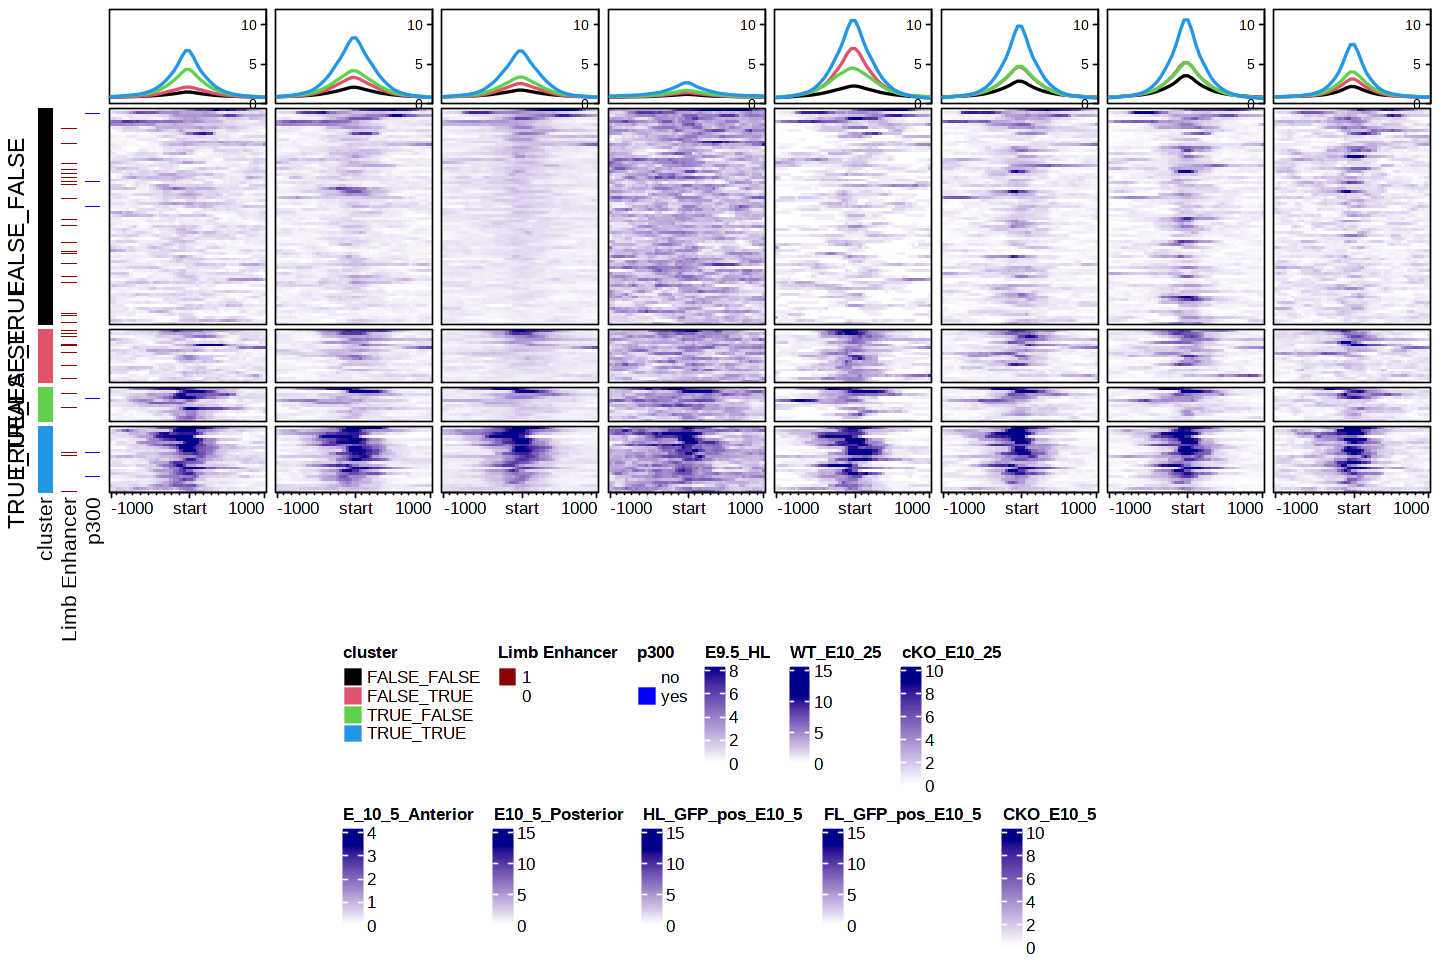

In [ ]:
h <- Heatmap(sp2, col = structure(1:length(unique(sp2))), name = "cluster", width = unit(3, "mm"), row_order = order(enriched_score(mat[['Etv2cKO_E10_25']]), decreasing = TRUE)) +
     Heatmap(bs$limb, col = c('white', 'darkred'), name = 'Limb Enhancer', 
              show_row_names = FALSE, width = unit(3, "mm")) +
     Heatmap(bs$p300, col = c('white', 'blue'), name = 'p300',
              show_row_names = FALSE, width = unit(3, "mm")) +
     EnrichedHeatmap(mat_new[['E9.5_HL']], col = col_fun_new[['E9.5_HL']], name = 'E9.5_HL', top_annotation = ta, pos_line = FALSE) 
     j <- c('WT_E10_25','cKO_E10_25','E_10_5_Anterior','E10_5_Posterior','HL_GFP_pos_E10_5','FL_GFP_pos_E10_5','CKO_E10_5')
     for (i in j[j %in% names(mat_new)]){
       h <- h +
       EnrichedHeatmap(mat_new[[i]], col = col_fun_new[[i]], name = i, top_annotation = ta, pos_line = FALSE) 
} 
options(repr.plot.width = 12, repr.plot.height = 8)
draw(h, heatmap_legend_side = 'bottom',  split = sp2)

# Line plot of the E10.5 Posterior only cluster for the Fold enrichment heatmap

Position ranging from -1KB to 1KB

In [ ]:
pos <- 1:2001 - (2001 + 1)/2

In [ ]:
bw <- lapply(s3_bw_files, function(bw_file){
 rtracklayer::import.bw(
    bw_file, 
    which = trim(GenomicRanges::reduce(resize(binding_sites, fix = 'center', width = target_width + extend * 2)))
  ) 
})

In [ ]:
cvg_bd <- lapply(bw, function(x){coverage(x, weight = 'score')[resize(binding_sites, fix = 'center', width = 2001)] %>% as.matrix()})

In [ ]:
for (i in 1:length(cvg_bd)){
  rownames(cvg_bd[[i]]) <- sp2
} ##naming the rows to a 'TRUE_FALSE' format

In [ ]:
line_df <- lapply(cvg_bd, function(m){m[grepl('FALSE_TRUE', rownames(m)),]}) ##Subsetting the cluster with only E10.5 posterior peaks
line_dat <- lapply(line_df, function(l){colMeans(l)}) ##ColMeans to get the line plot

In [ ]:
dat <- do.call('cbind', line_dat) ##Making a dataframe that contains colmeans 
dat <- cbind(dat, pos = pos)
dat <- as.data.frame(dat)
head(dat)

,E10_5_Posterior,E9.5_HL,Etv2cKO_E10_25,Etv2_CKO_E10_5,WT_E10_25,FL_GFP_pos_E10_5,HL_GFP_pos_E10_5,E_10_5_Anterior,pos
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.7899263,0.8120852,0.8375918,0.8026296,0.8651279,0.7890630,0.7699476,0.8700948,-1000
2,0.7911312,0.8116127,0.8372478,0.8030963,0.8645864,0.7872292,0.7686483,0.8700722,-999
3,0.7901523,0.8120716,0.8380587,0.8064005,0.8643419,0.7873187,0.7687978,0.8705899,-998
4,0.7904090,0.8116717,0.8387661,0.8059948,0.8651364,0.7865103,0.7693399,0.8702953,-997
5,0.7931810,0.8104793,0.8398212,0.8081165,0.8663734,0.7858844,0.7710138,0.8697515,-996
6,0.7932419,0.8117325,0.8410893,0.8108025,0.8663704,0.7841254,0.7718124,0.8711249,-995


In [ ]:
dat <- dat[,c('E10_5_Posterior', 'E9.5_HL', 'Etv2cKO_E10_25', 'pos')]

In [ ]:
long_df <- dat %>% gather(Sample, cvg, c('E10_5_Posterior', 'E9.5_HL', 'Etv2cKO_E10_25'))
head(long_df)

,pos,Sample,cvg
,<dbl>,<chr>,<dbl>
1,-1000,E10_5_Posterior,0.7899263
2,-999,E10_5_Posterior,0.7911312
3,-998,E10_5_Posterior,0.7901523
4,-997,E10_5_Posterior,0.7904090
5,-996,E10_5_Posterior,0.7931810
6,-995,E10_5_Posterior,0.7932419


Assigning colors to the sample to match the previous color scheme of the paper

In [ ]:
bg <- c(
  'E9.5_HL' = 'green',
  'E10_5_Posterior' = 'burlywood4',
  'Etv2_CKO_E10_5' = 'blue',
  'Etv2cKO_E10_25' = 'purple',
  'WT_E10_25' = 'lightblue',
  'FL_GFP_pos_E10_5' = 'coral',
  'HL_GFP_pos_E10_5' = 'cyan',
  'E_10_5_Anterior' = 'red'
)

In [ ]:
bg <- as.data.frame(bg)
bg$Sample <- rownames(bg)
bg

,bg,Sample
,<chr>,<chr>
E9.5_HL,green,E9.5_HL
E10_5_Posterior,burlywood4,E10_5_Posterior
Etv2_CKO_E10_5,blue,Etv2_CKO_E10_5
Etv2cKO_E10_25,purple,Etv2cKO_E10_25
WT_E10_25,lightblue,WT_E10_25
FL_GFP_pos_E10_5,coral,FL_GFP_pos_E10_5
HL_GFP_pos_E10_5,cyan,HL_GFP_pos_E10_5
E_10_5_Anterior,red,E_10_5_Anterior


In [ ]:
long_df$bg <- bg$bg[match(long_df$Sample, bg$Sample)] ##Adding the colors by matching Sample names to get the color in Long_df

In [ ]:
head(long_df)

,pos,Sample,cvg,bg
,<dbl>,<chr>,<dbl>,<chr>
1,-1000,E10_5_Posterior,0.7899263,burlywood4
2,-999,E10_5_Posterior,0.7911312,burlywood4
3,-998,E10_5_Posterior,0.7901523,burlywood4
4,-997,E10_5_Posterior,0.7904090,burlywood4
5,-996,E10_5_Posterior,0.7931810,burlywood4
6,-995,E10_5_Posterior,0.7932419,burlywood4


## Line Plot for the Posterior only cluster

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



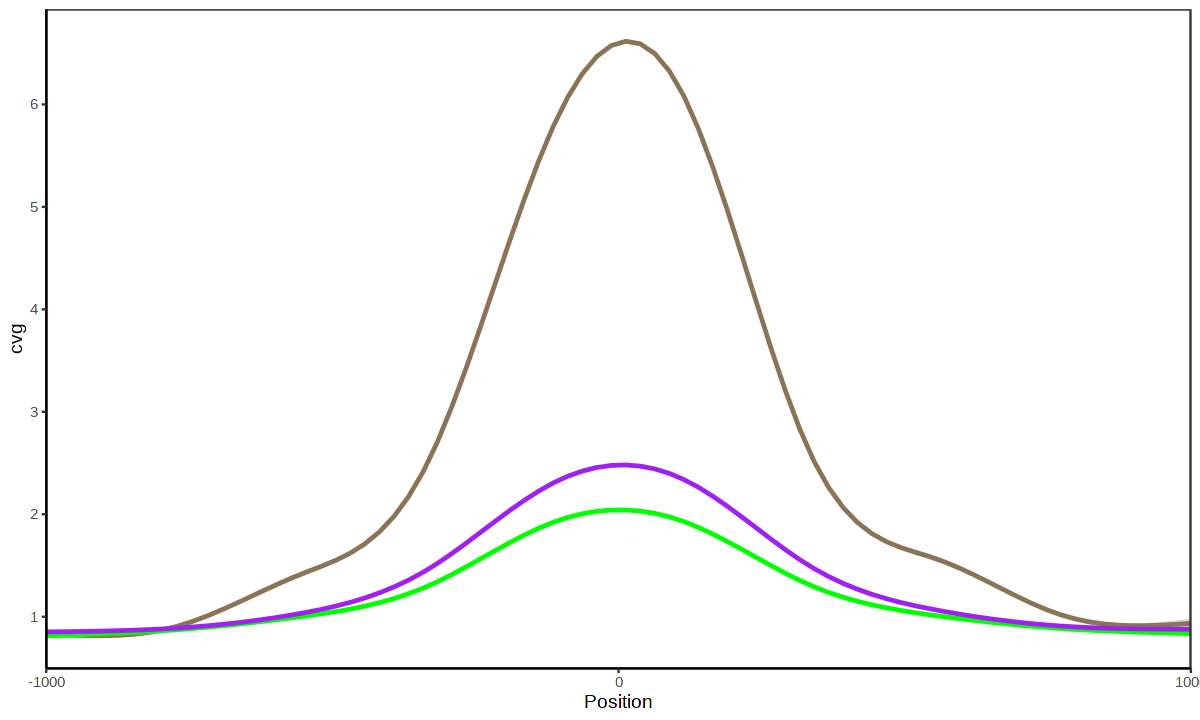

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 6)
ggplot(long_df, aes(x = pos, y = cvg, color = bg)) +
    #geom_line(size = 1.1) + 
    geom_smooth() +
    scale_x_continuous(name = 'Position', breaks = c(-1000, 0, 1000), expand = c(0, 0)) + scale_color_identity() +
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))

# Percent of Limb enhancers in each cluster

## Limb Enhancer Genie

In [ ]:
peak <- unique(sp2)

In [ ]:
peak

[1] FALSE_TRUE  TRUE_FALSE  TRUE_TRUE   FALSE_FALSE
Levels: FALSE_FALSE FALSE_TRUE TRUE_FALSE TRUE_TRUE

In [ ]:
lapply(peak, function(p){
  length(sp2[sp2 == p])
})

[[1]]
[1] 1229

[[2]]
[1] 792

[[3]]
[1] 1532

[[4]]
[1] 5010

In [ ]:
length(sp2[sp2== 'TRUE_TRUE'])

[1] 1532

In [ ]:
nrow(leg_sub[grepl('TRUE_TRUE', leg_sub$log),])/length(sp2[sp2== 'TRUE_TRUE'])

[1] 0.06723238

In [ ]:
leg_bar <- lapply(peak, function(p){nrow(leg_sub[grepl(p, leg_sub$log),])/length(sp2[sp2== p])})
leg_bar <- as.data.frame(do.call('rbind', leg_bar))
leg_bar$cluster <- as.character(peak)
leg_bar$col<- c("deepskyblue3","green","deeppink3","black")

In [ ]:
leg_bar

V1,cluster,col
<dbl>,<chr>,<chr>
0.20504475,FALSE_TRUE,deepskyblue3
0.07575758,TRUE_FALSE,green
0.06723238,TRUE_TRUE,deeppink3
0.11636727,FALSE_FALSE,black


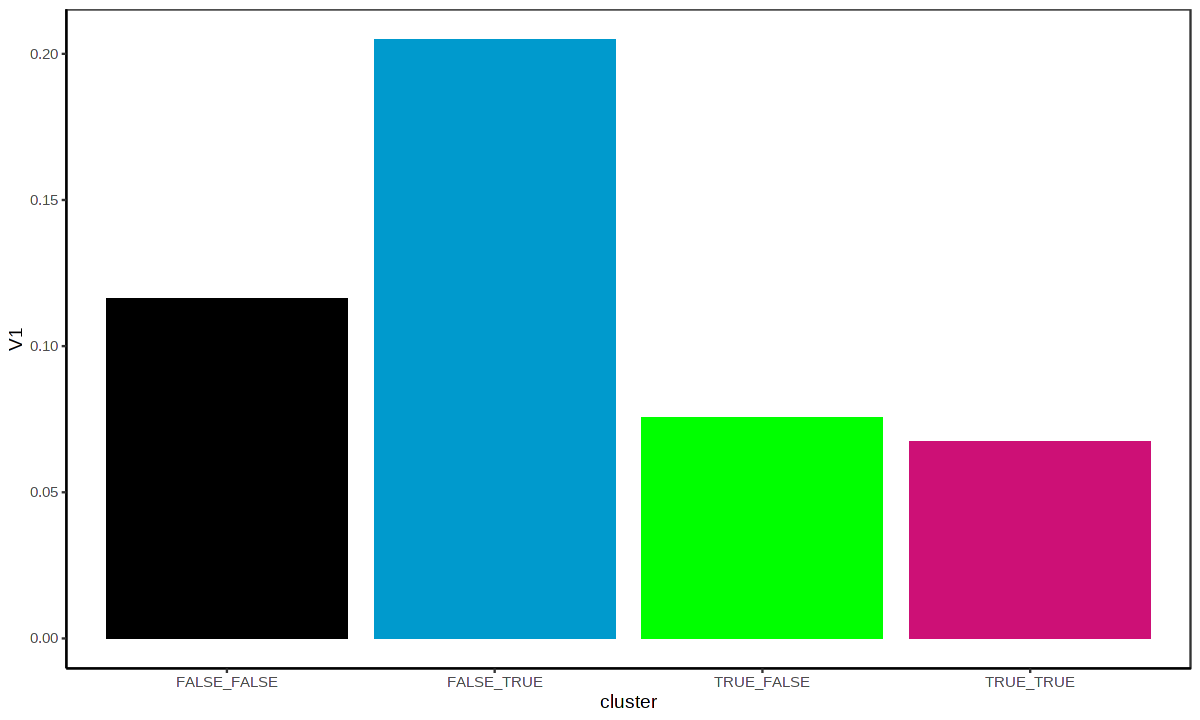

In [ ]:
ggplot(leg_bar, aes(x = cluster, y = V1, fill = col)) + geom_bar(stat = 'identity') + scale_fill_identity() + 
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))

## Limb enhancer from 'ChIP-seq accurately predicts tissue-specific activity of enhancers' paper

In [ ]:
p300_bar <- lapply(peak, function(p){nrow(p300_sub[grepl(p, p300_sub$log),])/length(sp2[sp2== 'TRUE_TRUE'])})
p300_bar <- as.data.frame(do.call('rbind', p300_bar))
p300_bar$cluster <- as.character(peak)
p300_bar$col <- c("deepskyblue3","green","deeppink3","black")

In [ ]:
p300_bar

V1,cluster,col
<dbl>,<chr>,<chr>
0.03067885,FALSE_TRUE,deepskyblue3
0.00848564,TRUE_FALSE,green
0.01958225,TRUE_TRUE,deeppink3
0.03851175,FALSE_FALSE,black


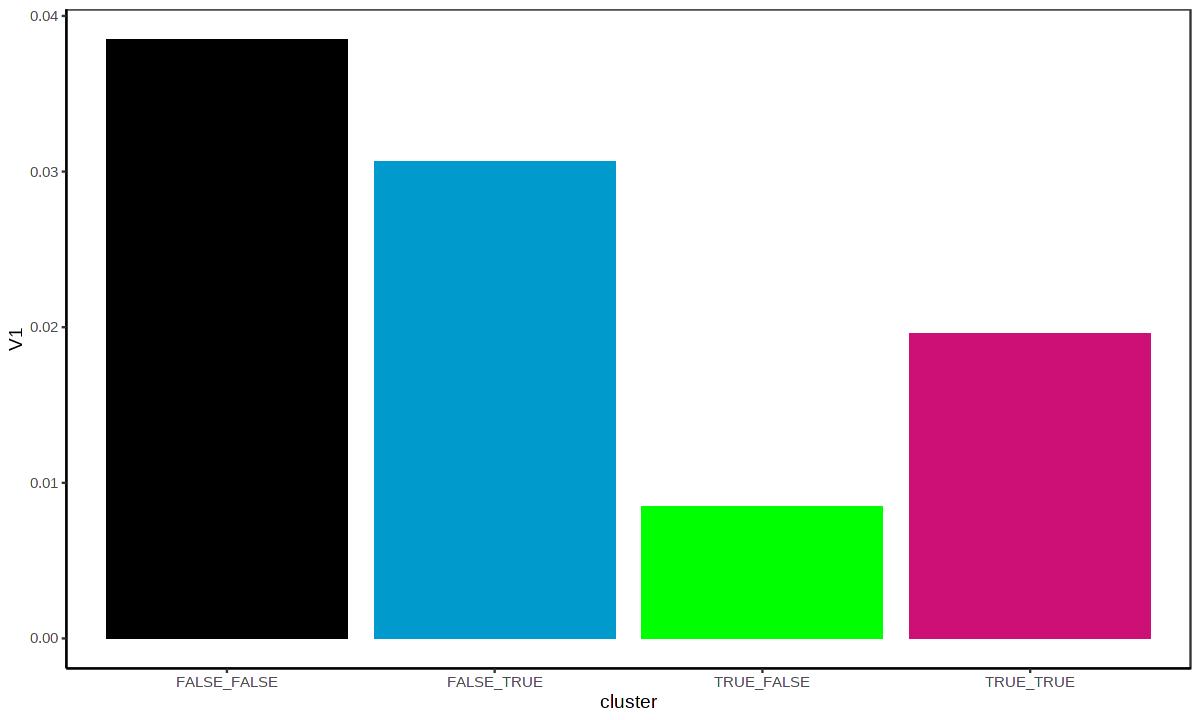

In [ ]:
ggplot(p300_bar, aes(x = cluster, y = V1, fill = col)) + geom_bar(stat = 'identity') + scale_fill_identity() + 
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))

In [ ]:
Sys.time() - start_time0

Time difference of 47.13125 mins

In [ ]:
sessionInfo()

R version 4.1.2 (2021-11-01)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/libopenblasp-r0.2.20.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
 [1] parallel  grid      stats4    stats     graphics  grDevices utils    
 [8] datasets  methods   base     

other attached packages:
 [1] tidyr_1.1.4                        reshape2_1.4.4                    
 [3] dbscan_1.1-8                       umap_0.2.7.0                      
 [5] EnrichedHeatmap_1.23.1             ggwordcloud_0.5.0                 
 [7] ggpl